# Why going deeper?

In the previous notebooks, we have used simple linear models to first solve a regression problem, i.e. predicting the house prices, and then a classification problem, i.e. predicting the survival of passengers on the Titanic. In both cases, we have used a simple linear model to predict the target variable. However, in many cases, the relationship between the input features and the target variable is not linear. In such cases, we need to use more complex models to capture the non-linear relationships between the input features and the target variable. 

In this notebook, we will use the simplest neural network, called a `Perceptron`, that is also one of the oldest artificial neural networks. As you will see, the Perceptron looks a lot like a `LogisticRegression`, however, a traditional `Perceptron` uses a different activation function. The `Perceptron` played an important role in modern AI and in this notebook we will show you why. 

## Supervised Learning [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) [sklearn]

The perceptron is one of the oldest artificial neural networks. It is also one of the easiest to understand.
Normally you can use the sklearn perceptron (one with more features, but similar functionality). This notebook will show a custom Perceptron. A lot of code is also intended to improve the intuïtion.


### Advantages of a Perceptron
------------------------------------------------------------
- Very fast to train
- Easy to understand a trained model


### Disadvantages of a Perceptron
------------------------------------------------------------
- Limited to solving problems that are linearly separable
- Can only indicate whether a class is present or not


### The parameters of a Perceptron include
------------------------------------------------------------
- Input vector size
- Learning rate
- Epochs to train


In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [3]:
"""
THIS CODE IS ONLY USED FOR MAKING PLOTS.
IT DOES NOT CONTAIN ML CODE.
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# bigger plots
#plt.rcParams['figure.figsize'] = [20, 15]

# Plot for showing the transition from classes in a (Multi-Layer) Perceptron
def plot_decisionbound(x_data, step_size, model):
    assert x_data.shape[1] == 2, f'Only 2D data can be displayed by this function. Given dataset has {x_data.shape[1]}D data.'
    h = step_size
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()

    # compute the results for all points in the mesh.
    Z = np.array([model.predict(c)
                  for c in zip(xx.ravel(), yy.ravel())])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape) # fit them into the desired shape
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # perform plot

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y)

    ax.set_title('Perceptron')

def plot_weights(model_weights, external_labels):
    fig, ax = plt.subplots()
    bar_width = 0.5
    indexes = np.arange(len(model_weights))

    positive = model_weights > 0
    negative = model_weights <= 0

    ax.bar(indexes[positive], model_weights[positive], color= 'green')
    ax.bar(indexes[negative], model_weights[negative], color= 'red')
    labels = ['bias'] + external_labels
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels, rotation=20)
    fig.tight_layout()
    plt.show()
    for i in range(len(labels)):
        print(f'{labels[i]}: {np.round(model_weights[i],3)}')

# The Perceptron

In [4]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr

    @staticmethod
    def L2normalise(x):
        """
        Normalisation function
        :param x: Numpy array or List of float to be normalised
        :return: L2 normalised vector
        """
        answer = None
        q = np.sqrt(np.sum(x*x))
        if q > 0:
            answer = x/q
        return answer

    def activation_fn(self, x):
        # simple activation, if the given value is 0 or positive, return 1, else 0
        return 1 if x >= 0 else 0  # step activation

    def predict(self, x):
        x_b = np.insert(x, 0,1)    # add the bias
        # The dot product already incorporates the L2 normalisation internally
        z = self.W.T.dot(x_b)      # compute the dot product
        a = self.activation_fn(z)  # compute activation
        return a

    def fit(self, X, d):
        for _ in range(self.epochs):   # for all epochs
            for i in range(d.shape[0]):   # for all given records
                y = self.predict(X[i])    # predict the output
                e = d[i] - y              # compute the error
                x = np.insert(X[i], 0, 1) # reconstruct the vector with bias
                # adjust the weights
                self.W = self.W + self.lr * e * x

## Normalisation and Spaces (a short intro)
The perceptron in the example (and many implementations) use metrics based on similarity. A similarity is (often) expressed between -1 (fully dissimilar) and 1 (exact copy). A distance is expressed between 0 and +infinite, where 0 is no distance (exact copy). Both the similarity and distance metrics have specific spaces and ways to measure them. There are many differences, many of which are outside the scope of this intro.

Using L2 normalisation is one of the easiest (and performant) ways of measuring similarity. Intuïtion: normalise a vector in a way that the sum of squares of all its parts equals 1.

$$\sum{\begin{bmatrix} I^2_1 \\ I^2_2 \\ ...\\I^2_x \end{bmatrix}} = 1$$

After this normalisation, when multiplying with a very simmilar vector the result is close to 1. The opposite occurs when the values are not equall at all (having negative values where the other has positives) this will result in a -1. When two vectors do not overlap (having a 0 where the other has a value) the result is 0.

# Example: Logic Gates

In [5]:
y_options = {'AND': np.array([0,
                              0,
                              0,
                              1]),
             'NAND':np.array([1,
                              1,
                              1,
                              0]),
             'OR':  np.array([0,
                              1,
                              1,
                              1]),
             'NOR': np.array([1,
                              0,
                              0,
                              0]),
             'XOR': np.array([0,
                              1,
                              1,
                              0]),}

X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

Y = y_options['NAND']

#### Train the perceptron model
Create a perceptron and train it for the given X and Y combination.

In [6]:
# instantiate a perceptron object
simple_perceptron = Perceptron(input_size=2)
# train the model by calling its fit function and given the X and Y combination
simple_perceptron.fit(X, Y)

#### Predict an unseen example
Given a list of numbers or numpy array, the result can be predicted.

In [7]:
# compute the predicted class
pred_clas = simple_perceptron.predict([0.5,0.4])
# display the outcome using a formatted print
print(f"The predicted outcome is: {pred_clas}")

The predicted outcome is: 1


#### Show the decision boundary for the trained network

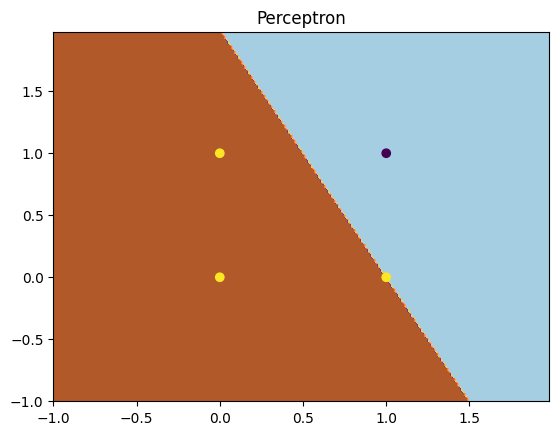

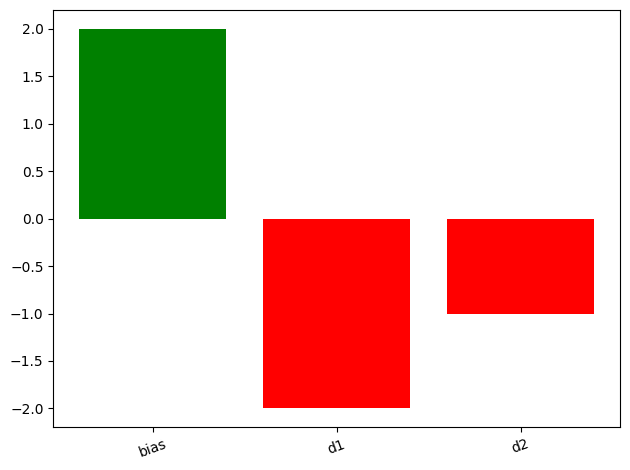

bias: 2.0
d1: -2.0
d2: -1.0


In [8]:
# show the decision bound for the perceptron and the given data (to display the bound between class 1 and 0)
plot_decisionbound(X, .02, simple_perceptron)

# display the ratio of the weights
plot_weights(simple_perceptron.W, ['d1','d2'])

The last plot requires some more in depth explanation.

When computing the result of a perceptron, the dot product between vectors is used.

This can be achieved by computing the L2 norm for both the input vector and the weigths.


So a classification can be displayed like this:

In [9]:
# Hardcode any vector with the same shape as the input data to test this method.
input_x = [0.5, 0.4]

in_vector = np.insert(input_x, 0,1) # add the bias value of 1 in front of the vector
model_weights = simple_perceptron.W # retrieve the perceptron weights

# normalise both given vectors using an L2 normalisation
in_vector_norm = simple_perceptron.L2normalise(in_vector)
model_weights_norm = simple_perceptron.L2normalise(model_weights)

# multiply the normalised vectors
multiplication = in_vector_norm * model_weights_norm

#
resultbuffer = np.sum(multiplication)
result = simple_perceptron.activation_fn(resultbuffer)

in_vec_s = pd.Series(name='input_vector', data=in_vector)
model_w_s = pd.Series(name='model_weights', data=model_weights)

df_overview = pd.DataFrame([
    pd.Series(name='input_vector', data=in_vector),
    pd.Series(name='model_weights', data=model_weights),
    pd.Series(name='L2 input_vector', data = in_vector_norm),
    pd.Series(name='L2 model_weights', data = model_weights_norm),
    pd.Series(name='Multiplication', data = in_vector_norm * model_weights_norm)],
)
df_overview.columns = ['bias','d1','d2']

df_overview

bias        d1        d2
input_vector      1.000000  0.500000  0.400000
model_weights     2.000000 -2.000000 -1.000000
L2 input_vector   0.842152  0.421076  0.336861
L2 model_weights  0.666667 -0.666667 -0.333333
Multiplication    0.561435 -0.280717 -0.112287

In [10]:
print(f'Result: {np.round(resultbuffer, 7)} -> {result}')

Result: 0.1684304 -> 1


The weights do give a clear indication of the importance of each variable given to the model.
A significant high positive or negative value indicates that the variable is of high importance to the classification.

## Train on Real data
Lets load some data from the CBS set.

In [11]:
import pandas as pd
import csv

# Read the data
column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv")) as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding='latin1') as file:
    data = pd.read_csv(file, sep =';')

Now that we have the data we can state a goal and train the network.
Let's state that we want to separate old neighbourhoods from new ones. For this example we already know that this is stated by the p_bjj2k and p_bjo2k variables. But the network does not know this. So we are algorithmically classifying old neighbourhoods as having a p_bjo2k smaller than 10 (less than 10 percent of the houses have been builded after 2000).
Because we "do not know" what variable gives the label of either group, we are introducing some additional variables from the original data.

In [ ]:
# Set constants
feature_names = ['p_bjj2k','p_bjo2k','p_koopw', 'p_bewndw']
selectionwindow = pd.Series([True]*data.shape[0])
for f in feature_names:
    selectionwindow = selectionwindow & (data[f] != '.')
data = data[selectionwindow]
for f in feature_names:
    data[f] = pd.to_numeric(data[f])

# slice the data
selected_region_type = 'Buurt'
data_for_selected_region_type = data[data.recs == selected_region_type]
train_x = data_for_selected_region_type[feature_names]

target_values = data_for_selected_region_type['p_bjo2k'] < 10
train_y = target_values

# convert the data
X = np.array([np.array([v[f] for f in feature_names])
              for i,v in train_x.iterrows()]
            )
Y = np.array([1 if v else 0
              for i,v in train_y.items()])
perceptron = Perceptron(input_size=len(feature_names), lr=0.2)

<ipython-input-12-fd2779a11711>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,v in train_y.iteritems()])


Now we can train the network on the sliced dataset.

In [13]:
perceptron.fit(X, Y)

If we selected 2D data, it can be plotted using a decisionbound plot. Otherwise the function will let us know that this data cannot be plotted and why. (try except is only added to ensure that the rest of the notebook can still continue)

In [14]:
try:
    plot_decisionbound(X,1,perceptron)
except AssertionError as e:
    print(e)
    pass

Only 2D data can be displayed by this function. Given dataset has 4D data.


Because the perceptron is an easy model, we can inspect the weights. From these we can see which variable has the largest predicting factor on the class.

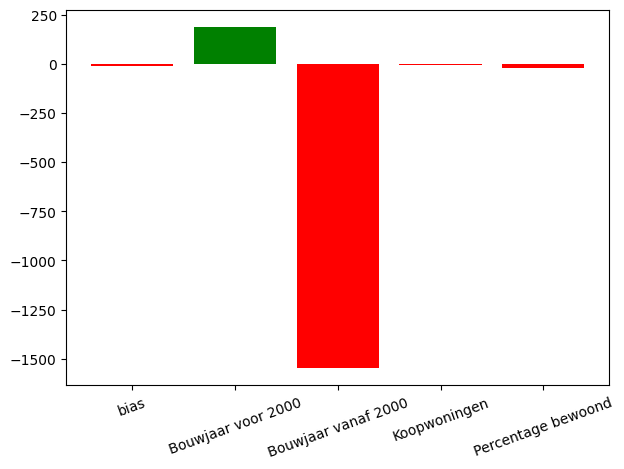

bias: -13.6
Bouwjaar voor 2000: 188.4
Bouwjaar vanaf 2000: -1548.8
Koopwoningen: -7.0
Percentage bewoond: -22.0


In [15]:
decoded_feature_names = [column_reference_table[f_name] for f_name in feature_names]
plot_weights(perceptron.W, decoded_feature_names)

In [16]:
input_x = [90, 10, 0, 90]

in_vector = np.insert(input_x, 0,1)
model_weights = perceptron.W

in_vector_norm = perceptron.L2normalise(in_vector)
model_weights_norm = perceptron.L2normalise(model_weights)

resultbuffer = np.sum(in_vector_norm * model_weights_norm)
result = perceptron.activation_fn(resultbuffer)

in_vec_s = pd.Series(name='input_vector', data=in_vector)
model_w_s = pd.Series(name='model_weights', data=model_weights)

df_overview = pd.DataFrame([
    pd.Series(name='input_vector', data=in_vector),
    pd.Series(name='model_weights', data=model_weights),
    pd.Series(name='L2 input_vector', data = in_vector_norm),
    pd.Series(name='L2 model_weights', data = model_weights_norm),
    pd.Series(name='Multiplication', data = in_vector_norm * model_weights_norm)],
)
df_overview.columns = ['bias'] + decoded_feature_names

df_overview

bias  Bouwjaar voor 2000  Bouwjaar vanaf 2000  \
input_vector       1.000000           90.000000            10.000000   
model_weights    -13.600000          188.400000         -1548.800000   
L2 input_vector    0.007832            0.704913             0.078324   
L2 model_weights  -0.008715            0.120735            -0.992536   
Multiplication    -0.000068            0.085107            -0.077739   

                  Koopwoningen  Percentage bewoond  
input_vector          0.000000           90.000000  
model_weights        -7.000000          -22.000000  
L2 input_vector       0.000000            0.704913  
L2 model_weights     -0.004486           -0.014099  
Multiplication       -0.000000           -0.009938

In [17]:
print(f'Result: {np.round(resultbuffer, 7)} -> {result}')

Result: -0.0026381 -> 0
